In [1]:
%load_ext autoreload
%autoreload 2
import tnetwork as tn
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx


In [2]:
def compute_stats(ps,tts,functions,names):
    sn1 = []
    sn2 = []
    ls = []
    ig=[]
    updates=[]


    scores = []

    for tt in tts:
        print("====",tt," ====")
        ps_tt=ps.aggregate_sliding_window(tt)
        #print(ps_tt.snapshots())
        ps_ig = ps_tt.to_DynGraphIG(sn_duration=tt)
        #print(ps_ig.interactions())
        #((score_sn_m,score_sn_e),score_ls,score_ig,score_udpate) = entropies(ps_tt,ps_ig)
        scores.append([tt]+[f(ps_tt,ps_ig) for f in functions])



    df = pd.DataFrame.from_records(scores,columns=["tts"]+names)
    return df

In [3]:
def score_sn_m(g_sn,g_ig):
    return(tn.code_length_SN_M(g_sn))
def score_sn_e(g_sn,g_ig):
    return(tn.code_length_SN_E(g_sn))
def score_ig(g_sn,g_ig):
    return(tn.code_length_IG(g_ig))
#def score_update(g_sn,g_ig):
#    return(tn.code_length_update(g_sn))
def score_ls(g_sn,g_ig):
    return tn.code_length_LS(g_sn)

def stability(g_sn,g_ig):
    return(g_sn.stability())
def synchronicity(g_sn,g_ig):
    return g_sn.synchronicity()

In [4]:
#functions = [score_ls,score_sn_m,score_ig,score_sn_e,score_update,stability,synchronicity]
#names= ["$LS$","$SN_M$","$IG$","$SN_E$","update","stability","synchronicity"]
functions = [score_ls,score_sn_m,score_ig,score_sn_e]
names= ["$LS$","$SN_M$","$IG$","$SN_E$"]
nb_edges = 640
nb_steps=64

In [5]:
tts=[32,16,8,4,2,1]

aGraph = nx.generators.gnm_random_graph(100,nb_edges)
dynnet = tn.DynGraphSN([aGraph]*nb_steps)
#functions=[score_ls,score_sn_m,score_ig,score_sn_e,score_update,stability,synchronicity]
#names= ["$LS$","$SN_M$","$IG$","$SN_E$","update","stability","synchronicity"]


#tts = [int(day)]

df_stable = compute_stats(dynnet,tts,functions,names)



==== 32  ====
==== 16  ====
==== 8  ====
==== 4  ====
==== 2  ====
==== 1  ====


In [6]:
df_stable

,tts,$LS$,$SN_M$,$IG$,$SN_E$
0,32,10424.135923,9786.135923,10424.135923,17036.847271
1,16,14904.135923,11072.135923,10424.135923,34077.694541
2,8,25784.135923,13648.135923,10424.135923,68163.389082
3,4,52024.135923,18808.135923,10424.135923,136342.778165
4,2,114104.135923,29144.135923,10424.135923,272717.556329
5,1,253333.521589,49200.704558,10424.135923,536974.257659


In [7]:
tts=[32,16,8,4,2,1]

dynnet = tn.DynGraphSN([nx.generators.planted_partition_graph(10,10,nb_edges/10/(10*10),0) for i in range(nb_steps)])

df_independent = compute_stats(dynnet,tts,functions,names)




==== 32  ====
==== 16  ====
==== 8  ====
==== 4  ====
==== 2  ====
==== 1  ====


In [8]:
tts=[1024,512,256,128,64,32,16,8,4,2,1]

dynnet = tn.DynGraphSN([nx.generators.planted_partition_graph(10,10,nb_edges/10/(10*10)/16,0/16) for i in range(nb_steps*16)])



#tts = [int(day)]

df_unstable = compute_stats(dynnet,tts,functions,names)





==== 1024  ====
==== 512  ====
==== 256  ====
==== 128  ====
==== 64  ====
==== 32  ====
==== 16  ====
==== 8  ====
==== 4  ====
==== 2  ====
==== 1  ====


In [9]:
tts=[32,16,8,4,2,1]
aGraph = nx.generators.gnm_random_graph(100,nb_edges)

edges= list(aGraph.edges())
splitted = [nx.Graph(edges[int(i*(nb_edges/nb_steps)):int((i+1)*(nb_edges/nb_steps))]) for i in range(nb_steps)]
dynnet = tn.DynGraphSN(splitted)

df_spread = compute_stats(dynnet,tts,functions,names)





==== 32  ====
==== 16  ====
==== 8  ====
==== 4  ====
==== 2  ====
==== 1  ====


In [10]:
tts=[32,16,8,4,2,1]
dynnet,_ = tn.generate_simple_random_graph()

#edges= list(aGraph.edges())
#splitted = [nx.Graph(edges[int(i*(nb_edges/nb_steps)):int((i+1)*(nb_edges/nb_steps))]) for i in range(nb_steps)]
#dynnet = tn.DynGraphSN(splitted)

tn_bench = compute_stats(dynnet.to_DynGraphSN(1),tts,functions,names)






generating graph with nb_com =  10


100% (20 of 20) |########################| Elapsed Time: 0:00:02 ETA:  00:00:00

==== 32  ====
==== 16  ====
==== 8  ====
==== 4  ====
==== 2  ====
==== 1  ====


Text(0, 0.5, 'code length')

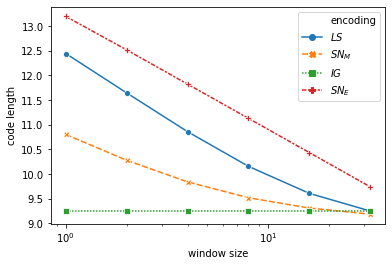

In [11]:
long = pd.melt(df_stable,id_vars=['tts'],value_vars=names)
long["value"]=np.log(long["value"])
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")

Text(0, 0.5, 'code length')

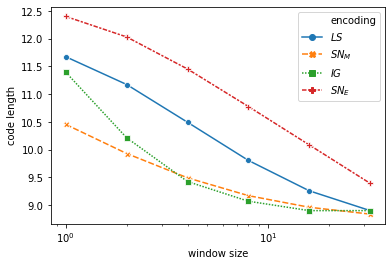

In [12]:
long = pd.melt(df_independent,id_vars=['tts'],value_vars=names)
long["value"]=np.log(long["value"])
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")

Text(0, 0.5, 'code length')

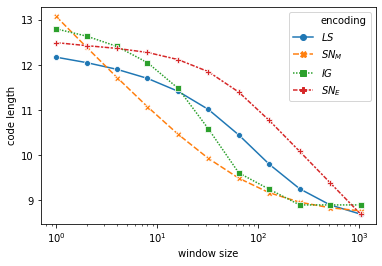

In [13]:
long = pd.melt(df_unstable,id_vars=['tts'],value_vars=names)
long["value"]=np.log(long["value"])
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")


Text(0, 0.5, 'code length')

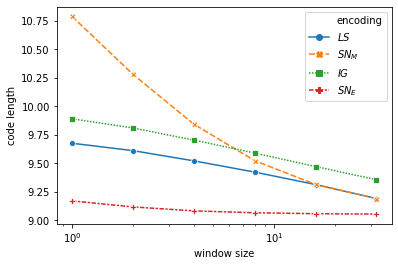

In [14]:
long = pd.melt(df_spread,id_vars=['tts'],value_vars=names)
long["value"]=np.log(long["value"])
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")



Text(0, 0.5, 'code length')

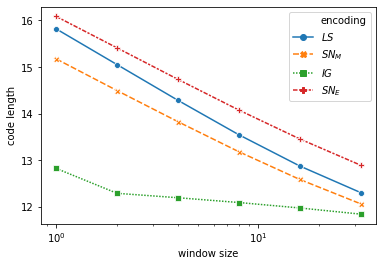

In [15]:
long = pd.melt(tn_bench,id_vars=['tts'],value_vars=names)
long["value"]=np.log(long["value"])
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")


